# Maps

## 1. Introduction

Maps are a way to present information on a (roughly) spherical earth on a flat plane, like a page or a screen. Here are two examples of common map projections. The projection is only accurate in the region where the plane touches the sphere, and is less accurate as the distance between the plane and the sphere increases.

#### Mercator
![Mercator](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Usgs_map_mercator.svg/413px-Usgs_map_mercator.svg.png)

#### Lambert conformal conic
![Lambert conformal conic](https://upload.wikimedia.org/wikipedia/commons/d/da/USGS_map_Albers_conic_tall.gif)

You can read more about map projections from [_Map Projections – a Working Manual_](http://pubs.usgs.gov/pp/1395/report.pdf), the source of the images above, or, more entertainingly, from [XKCD](https://xkcd.com/977/).

We'll use `cartopy` to plot on maps. Check out the [gallery](http://scitools.org.uk/cartopy/docs/latest/gallery.html) for inspiration.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs

Here we have the most basic projection: plate carrée, which is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection), and is essentially equivalent to just plotting the longitude and latitude values without a projection.

To set this plot up as knowing about relevant geographic coordinates, we can simply input the `projection` keyword argument.

In [ ]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')  # coastline resolution options are '110m', '50m', '10m'
ax.gridlines()

`cartopy` provides a number of projections, but these require more information be input when the map class is instantiated. [Available projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) are:

    PlateCarree
    AlbersEqualArea
    AzimuthalEquidistant
    LambertConformal
    LambertCylindrical
    Mercator
    Miller
    Mollweide
    Orthographic
    Robinson
    Sinusoidal
    Stereographic
    TransverseMercator
    UTM
    InterruptedGoodeHomolosine
    RotatedPole
    OSGB
    EuroPP
    Geostationary
    Gnomonic
    LambertAzimuthalEqualArea
    NorthPolarStereo
    OSNI
    SouthPolarStereo  

Lambert Conformal Conic is a useful projection in numerical modeling because it preserves right angles. Here is the default version of this projection:

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-96.0, central_latitude=28.0))
ax.coastlines(resolution='110m')
ax.gridlines()

Let's make a map of the Gulf of Mexico using the `LambertConformal` projection. For most projections that do not include the whole earth, some information about the range of latitudes and longitudes to be included need to be specified.


In [ ]:
plt.figure(figsize=(10,6))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-85.0, central_latitude=25.0))
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-')
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-100, -70, 15, 35], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)

The map is actually plotted in a 'projected' coordinate system, with units in meters, but the package deals with the projection behind the scenes. We can see this by looking at the limits of the two axes, which don't look like longitude/latitude at all:

In [ ]:
ax.get_xlim(), ax.get_ylim()

This is pretty good, but there are some limitations in this package currently. One is that we can't add labels to the lat/lon lines for the Lambert Conformal Conic projection. We can do this using Mercator, though:

In [ ]:
plt.figure(figsize=(10, 6))
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
ax = plt.axes(projection=ccrs.Mercator(central_longitude=-85.0))
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-100, -70, 15, 35], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)

# Now we can add on lat/lon labels:
# more info: http://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-105, -95, -85, -75, -65])  # control where the ticks are
gl.xlabel_style = {'size': 15, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}
gl.xlabels_top = False  # turn off labels where you don't want them
gl.ylabels_right = False

When we want to add something to the plot, we just need to tell it what projection the information is given in using the `transform` keyword argument.

If the information is in latitude/longitude – typical for the way people tend to think about information (instead of arbitrary projected locations) – then we give the Plate Carree projection with the `transform` keyword argument to the plot call:
> `transform=ccrs.PlateCarree()`

A nice thing about the `cartopy` package is that you can plot directly data from any projection — you just tell it the projection through the `transform` keyword argument when you add to the plot.

---
### _Exercise_

> The latitude and longitude of College Station are given below. Plot the location of College Station on the map above with a red dot.

---

In [ ]:
# College Station: 30°36′05″N 96°18′52″W
lat_cll = 30.0 + 36.0/60.0 + 5.0/3600.0
lon_cll = -(96.0 + 18.0/60.0 + 52.0/3600.0)

We can also just plot data without any of the nice additional features that come with `cartopy` (like coastline, rivers, etc) because we want the information to look correct on a map.

Below, I demonstrate the the PlateCarree projection is the same as just plotting longitude and latitude on a plot without a projection.

In [ ]:
import cmocean.cm as cmo

d = np.load('../data/cascadia.npz')

fig = plt.figure(figsize=(12, 20))

# no projection
ax1 = fig.add_subplot(2, 1, 1)
mappable = ax1.pcolormesh(d['lon'], d['lat'], d['z'], cmap=cmo.delta)
ax1.axis('equal')

# PlateCarree projection
# we input here the projection that we want the plot to use
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# we input here the transform that the coordinates are being presented in.
# in this case, the data is in lon/lat so we use PlateCarree:
ax2.pcolormesh(d['lon'], d['lat'], d['z'], cmap=cmo.delta, transform=ccrs.PlateCarree())

# the same data values and therefore data range are being plotted in each subplot so the mappable
# from one of them will work for the colorbar for all of them
fig.colorbar(mappable, orientation='horizontal')  

---
### _Exercise_

> Add another subplot to the figure above and in it, plot another projection of your choice. How do they compare?

---

Next we look at hurricanes tracks on a map.

We start with some code to read in the hurricane track information and quickly look at them:

In [ ]:
from pykml import parser
from zipfile import ZipFile

kmz = ZipFile('../data/AtlanticHurricanes.kmz', 'r')
kml = kmz.open('doc.kml', 'r')

hurricanes = parser.fromstring(kml.read())

tracks = []
for decade in range(len(hurricanes.Document.Folder.Folder)):
    doc = hurricanes.Document.Folder.Folder[decade]
    try:
        for storm in range(len(doc.Document.Placemark)):
            track_text = hurricanes.Document.Folder.Folder[decade].Document.Placemark[storm].LineString.coordinates.text
            track = []
            for location in track_text.split():
                track.append(np.fromstring(location, sep=','))
            tracks.append(np.array(track)[:, :2])
    except:
        pass  # there is more recent data to be had here... Perhaps a good homework topic.

            
for track in tracks:
    plt.plot(track[:, 0], track[:, 1], '-k', lw=0.2)

The plot isn't particularly helpful without land for context, and we'd also like to use a projection to get a less flat view.

In [ ]:
# set up our projection for the plot
projection = ccrs.LambertAzimuthalEqualArea(central_longitude=-40.0, central_latitude=25.0)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=projection)
ax.set_extent([-100, 20, 0, 50])

ax.add_feature(cartopy.feature.LAND, facecolor='0.8')
ax.add_feature(cartopy.feature.OCEAN, facecolor='w')
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-')
import matplotlib.ticker as mticker
gl.xlocator = mticker.FixedLocator(np.arange(-120, 80, 10))

for track in tracks:
    ax.plot(track[:, 0], track[:, 1], '-r', lw=0.1, transform=ccrs.PlateCarree())


## Point conversion

While `cartopy` removes the need to convert points on your own between projections (instead doing it behind the scenes), you can always convert between projections if you want using the following:

In [ ]:
projection = ccrs.Mercator()

x, y = projection.transform_point(-93.0-45.0/60.0, 27.0+55.0/60.0, ccrs.PlateCarree())
print(x, y)

---
### _Exercise_

> Show that you can plot data from multiple projections onto a single map.
> Set up a figure with a projection and add a coastline and whatever other features you want. Plot College Station in lon/lat. Next convert the location for College Station to another projection, and plot it (in the new coordinates) onto your map.

---

## Other features you can add

The code we used earlier, like:

    ax.add_feature(cartopy.feature.LAND)

was a convenience function wrapping more complex and capable code options. Here we explore a little more the capabilities. Note that this requires downloading data which you will see a warning about.

We can set up the ability to plot with high resolution land data:

In [65]:
# this is another way to do `ax.add_feature(cartopy.feature.LAND)` but to have more control over it
# 50m: moderate resolution data
import cartopy.feature as cfeature
# set up for plotting land
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=cfeature.COLORS['land'])
# set up for plotting water at higher resolution
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                         edgecolor='face', facecolor=cfeature.COLORS['water'])

There are also some built-in colors:

In [58]:
sorted(cfeature.COLORS.keys())

['land', 'land_alt1', 'water']

Here is a list (with reference names in some cases appended) of the [many features](http://www.naturalearthdata.com/features/) that are available through Natural Earth:

*(10, 50, 110 for high, medium, low resolution)*

**Physical Vector Data Themes:**

(`physical`)

* Coastline (10, 50, 110): `coastline`
* Land (10, 50, 110): `land`
* Ocean (10, 50, 110): `ocean`
* Minor Islands (10): `minor_islands`, `minor_islands_coastline`
* Reefs (10): `reefs`
* Physical region features (10): `geography_regions_polys`, `geography_regions_points`, `geography_regions_elevation_points`, `geography_marine_polys`
* Rivers and Lake Centerlines (10, 50, 110): `rivers_lake_centerlines`
* Lakes (10, 50, 110): `lakes`
* Glaciated areas (10, 50, 110): `glaciated_areas`
* Antarctic ice shelves (10, 50): `antarctic_ice_shelves_polys`, `antarctic_ice_shelves_lines`
* Bathymetry (10): `bathymetry_all` or choose which depth(s)
* Geographic lines (10, 50): `geographic_lines`
* Graticules (10, 50, 110): (grid lines) `graticules_all` or choose degree interval


**Raster Data Themes:**

(`raster`: land coloring)

* Cross Blended Hypsometric Tints (10, 50)
* Natural Earth 1 (10, 50)
* Natural Earth 2 (10, 50)
* Ocean Bottom (10, 50)
* Bathymetry (50)
* Shaded Relief (10, 50)
* Gray Earth (10, 50)
* Manual Shaded Relief (10, 50)


**Cultural Vector Data Themes:**

(`cultural`)

* Countries (10, 50, 110): `admin_0_countries`, `admin_0_countries_lakes`, `admin_0_boundary_lines`
* Disputed areas and breakaway regions (10, 50)
* First order admin (provinces, departments, states, etc.) (10, 50): e.g. `admin_1_states_provinces_lines`
* Populated places (10, 50, 110)
* Urban polygons (10, 50)
* Parks and protected areas (10): `parks_and_protected_lands`
* Pacific nation groupings (10, 50, 110)
* Water boundary indicators (10)

Using higher resolution can be pretty significantly different.

Prep higher resolution land and ocean information

In [91]:
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

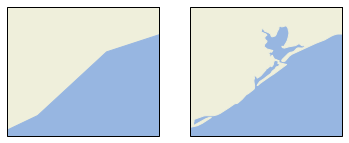

In [94]:
projection=cartopy.crs.LambertConformal(central_longitude=-95.0, central_latitude=29.0)

fig = plt.figure()

# lower resolution
ax1 = fig.add_subplot(1,2,1, projection=projection)
ax1.set_extent([-96, -94, 28.5, 30], cartopy.crs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)


# now higher resolution
ax2 = fig.add_subplot(1,2,2, projection=projection)
ax2.set_extent([-96, -94, 28.5, 30], cartopy.crs.PlateCarree())
ax2.add_feature(ocean_50m)
ax2.add_feature(land_10m)
